<a href="https://colab.research.google.com/github/edyy-Z/Data-Analysis-Class-Works/blob/main/DataAnalysis_Lab_5_Fall24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 5

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('sample_data/dtaset.csv')

In [ ]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

**1--  Create training and testing datasets.**  



Using a linear regression model, we plan to predict the price of the car (price) based on body type (body_type), driving distance (km), type of use (Type), number of gears (Gears), previous own (Previous_Owners), drive chain (Drive_chain), and engine power in kilowatts (hp_KW).

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['body_type'] = le.fit_transform(df['body_type'])
df['Type'] = le.fit_transform(df['Type'])
df['Drive_chain'] = le.fit_transform(df['Drive_chain'])

In [ ]:
df_cleaned = df.dropna(subset=['price', 'body_type', 'km', 'Type', 'Gears', 'Previous_Owners', 'Drive_chain', 'hp_kW'])
X = df_cleaned[['body_type', 'km', 'Type', 'Gears', 'Previous_Owners', 'Drive_chain', 'hp_kW']]
y = df_cleaned['price']

In [ ]:
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,4,15770,VAT deductible,56013.000000,4,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,1,3.8
1,Audi A1,4,14500,Price negotiable,80000.000000,4,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,1,5.6
2,Audi A1,4,14640,VAT deductible,83450.000000,4,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,1,3.8
3,Audi A1,4,14500,VAT deductible,73000.000000,4,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,1,3.8
4,Audi A1,4,16790,VAT deductible,16200.000000,4,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,1,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,7,39950,VAT deductible,1647.362609,2,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...",...,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,1,5.3
15911,Renault Espace,7,39885,VAT deductible,9900.000000,4,Benzine,7.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...",...,1.0,165.0,0,Metallic,Cloth,Automatic,1798.0,1708.0,1,7.4
15912,Renault Espace,7,39875,VAT deductible,15.000000,3,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,146.0,1,Metallic,Part/Full Leather,Automatic,1997.0,1734.0,1,5.3
15913,Renault Espace,7,39700,VAT deductible,10.000000,3,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB",...,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,1,5.3


**2-- Run an OLS regression on the data.  Get the mean-squared-error on your testing data.**  






We will make the training and testing datasets, where we will hold out 30% randomly of the total sample to test on.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred = ols_model.predict(X_test)

print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 3881.6983118871494


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

R-squared: 0.7230426923407596


 The model achieved a Mean Squared Error (MSE) of 3881.70, perhaps indicating an acceptable level of accuracy in predicting car price. Without anything to compare this MSE to, we really do not know if it is small or big.  This suggests that the model is able to capture some of the underlying relationships between these variables and democratic corruption.

**3-- Also get the coefficients from the model.  Interpret some of them.**

In [ ]:
coefficients = pd.Series(ols_model.coef_, index=X.columns)
coefficients

,0
body_type,298.145407
km,-0.068268
Type,-876.298758
Gears,2699.395753
Previous_Owners,-842.512986
Drive_chain,-765.664557
hp_kW,147.015434



* km: A one-unit increase in distance drive (km) is associated with a very small decrease in car price (price), specifically -0.068268.
* Gears: A one-unit increase in gears (km) is associated with huge increase in car price (price), specifically 2699.395753.
* hp_KW: A one-unit increase in horsepower (km) is associated with increase in car price (price), specifically 147.015434.

**4-- Prepare to run a random forest model over the same data.  Select the best parameters using grid-search.**  

I am performing hyperparameter tuning for a Random Forest Regressor model using GridSearchCV to find the optimal combination of parameters (n_estimators, max_depth, min_samples_split) that yields the best model performance (highest score).

In [ ]:
rf1 = RandomForestRegressor()

n_estimators = [50, 100, 300]
max_depth = [None, 1, 5]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf1, hyperF, cv = 3, verbose = 1,
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print("Best Parameters: %f using %s" % (bestF.best_score_, bestF.best_params_))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: 0.874458 using {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


**5-- Run the best model and get the mean-squared-error on your testing data. Compare that mean-squared-error to the OLS one.  How similar/different are they?**

In [ ]:
rf_best = RandomForestRegressor(max_depth= 5, min_samples_split= 5, n_estimators= 50, min_samples_leaf=1)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 3176.0518517599053


Mean Squared Error from ols: 3881.70

Mean Squared Error from ramdomforestregessor: 3176.05

This implies that the random forest model performed a better at predicting accurately than did the the OLS model.  

In [ ]:
# Calculate and print the R-squared value using the model's score method
r_squared = rf_best.score(X_test, y_test)
print('R-squared:', r_squared)

R-squared: 0.8145851819222748


**6-- Get feature importances and interpret them.**  

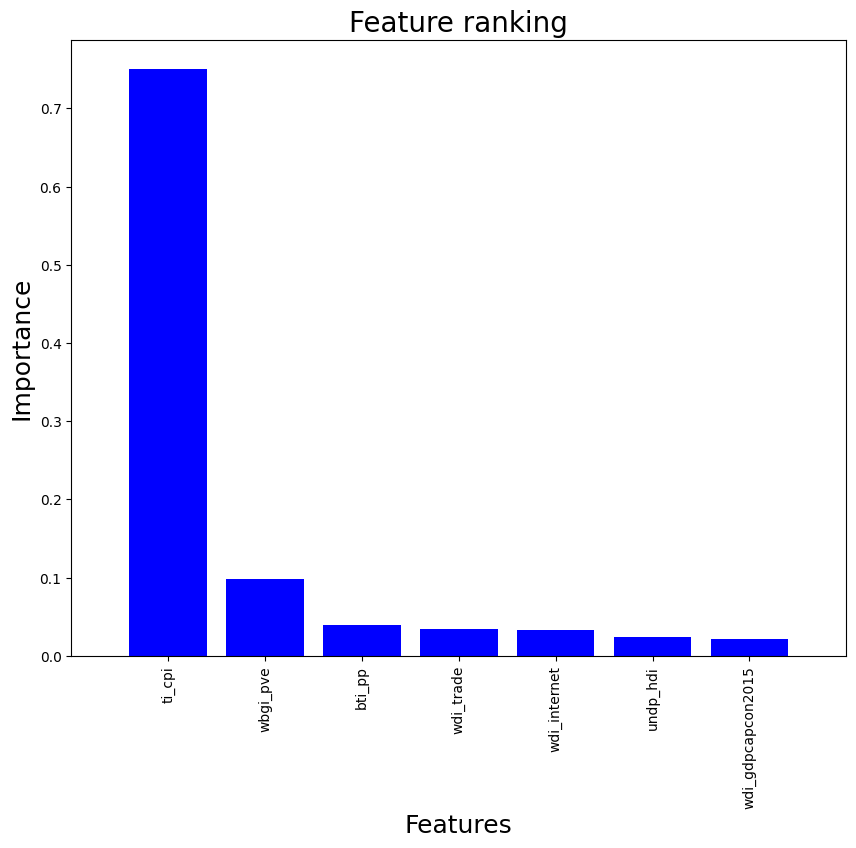

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# For rf_best as our trained Random Forest model
importance = rf_best.feature_importances_
indices = np.argsort(importance)[::-1]
feature_names = X.columns

f, ax = plt.subplots(figsize=(10, 8))
plt.title("Feature ranking", fontsize=20)
plt.bar(range(X.shape[1]), importance[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)  # Use indices to sort feature names
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance", fontsize=18)
plt.xlabel("Features", fontsize=18)
plt.show()

Plot ranks the features by their importance showing Corruption-Perceptions is by far, the most importance. That is, for what it is worth, when Corruption-Perceptions is not present in the prediction function, the model is much less accurate.

Or we would rather just view it as a table:

In [ ]:
feature_importances = rf_best.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)

             Feature  Importance
3             ti_cpi    0.750057
1           wbgi_pve    0.097760
5             bti_pp    0.039829
0          wdi_trade    0.034485
4       wdi_internet    0.032547
2           undp_hdi    0.023618
6  wdi_gdpcapcon2015    0.021704
